# Prediction Model for USA Housing Dataset

### Prepaed By: CHANDAN D.CHAUDHARI
© CopyRight 

## Business Problem: 
## In the real estate industry, understanding the factors influencing property prices is essential for effective decision-making by real estate professionals, developers, and potential buyers. We have access to a dataset containing information such as "Avg. Area Income," "Avg. Area House Age," "Avg. Area Number of Rooms," "Avg. Area Number of Bedrooms," "Area Population," and "Price" for various residential properties. The problem is to analyze and model the relationships between the given attributes and property prices. We aim to develop insights that can guide strategic decisions in the real estate market.

In [1]:
import numpy as np
import pandas as pd

# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Dataset using Pandas library function

URL = 'https://raw.githubusercontent.com/chandanc5525/BootCamp_CDC/main/Machine%20Learning%20Using%20Scikit%20Learn/Linear%20Regression/USA_Housing.csv'
data = pd.read_csv(URL)
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [4]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Data Visualization and Exploratory Data Analysis

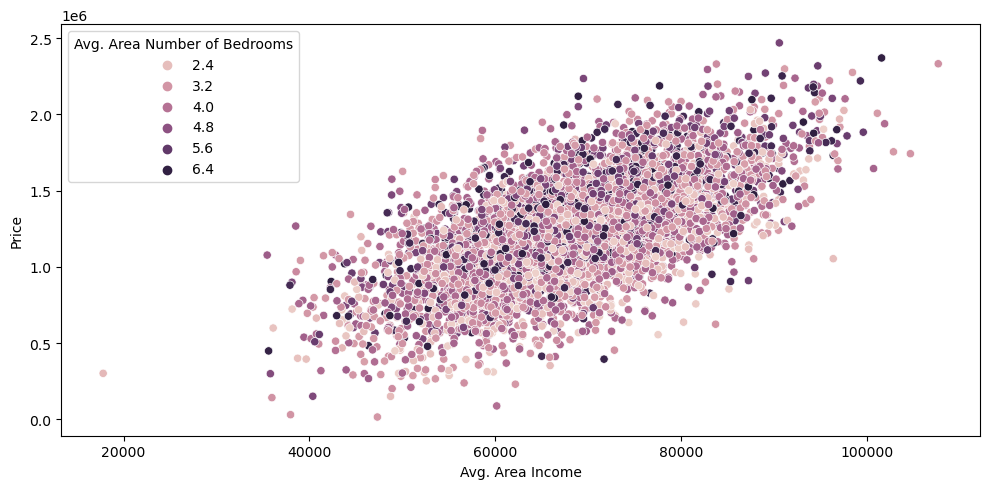

In [5]:
plt.figure(figsize=(10,5))  # Adjust the figure size as needed
sns.scatterplot(x = data['Avg. Area Income'], y = data['Price'],hue = data['Avg. Area Number of Bedrooms'])
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

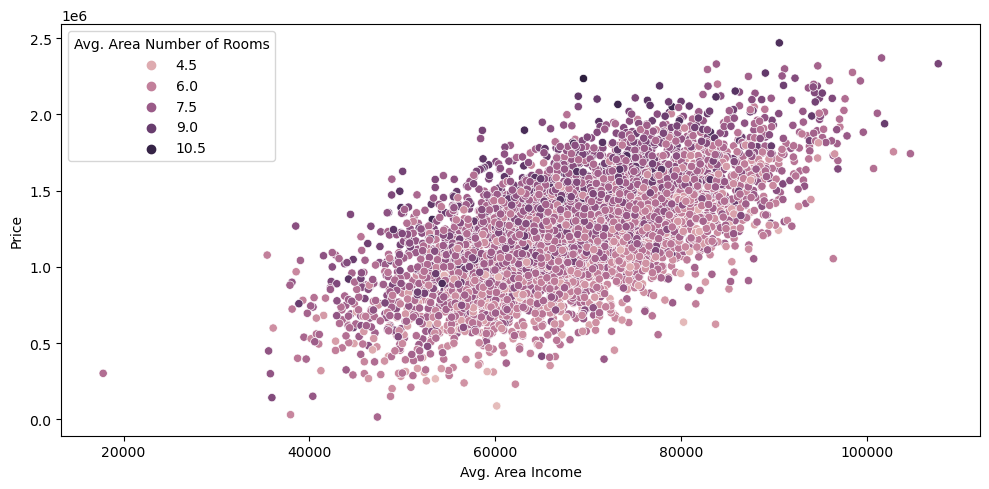

In [6]:
plt.figure(figsize=(10,5))  # Adjust the figure size as needed
sns.scatterplot(x = data['Avg. Area Income'], y = data['Price'],hue = data['Avg. Area Number of Rooms'])
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

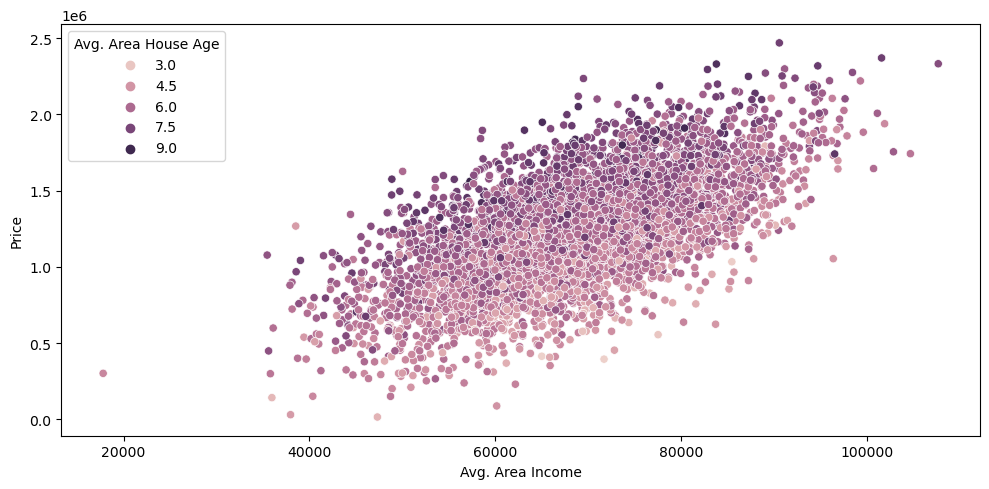

In [7]:
plt.figure(figsize=(10,5))  # Adjust the figure size as needed
sns.scatterplot(x = data['Avg. Area Income'], y = data['Price'],hue = data['Avg. Area House Age'])
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

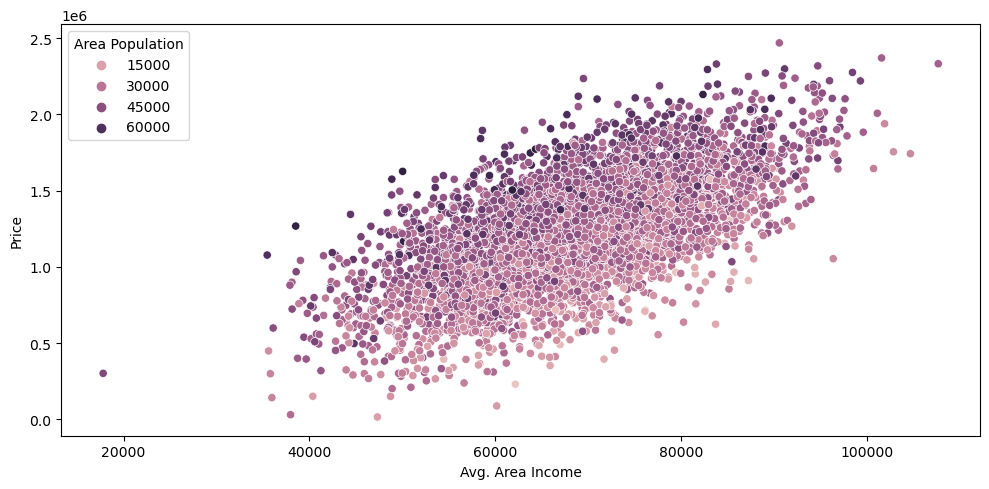

In [8]:
plt.figure(figsize=(10,5))  # Adjust the figure size as needed
sns.scatterplot(x = data['Avg. Area Income'], y = data['Price'],hue = data['Area Population'])
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [9]:
# Example 1: Creating a new feature 'Price per Room'
data['Price_per_Room'] = data['Price'] / data['Avg. Area Number of Rooms']

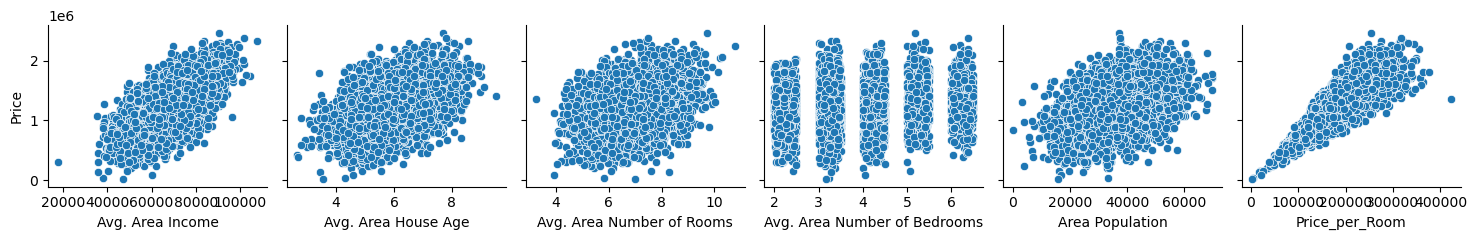

Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Area Population                 0.408556
Price                           1.000000
Price_per_Room                  0.852217
Name: Price, dtype: float64


In [10]:
# Pairplot to visualize relationships between numerical columns and the target
sns.pairplot(data, x_vars=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                           'Avg. Area Number of Bedrooms', 'Area Population','Price_per_Room'], 
                   y_vars=['Price'])
plt.tight_layout()
plt.show()

# Correlation matrix to quantify relationships
correlation_matrix = data.corr()
print(correlation_matrix['Price'])

In [11]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Price_per_Room
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",151092.185899
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",223730.643049
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",124400.551590
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,225644.895655
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,80483.770753
...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,172744.378289
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352",225432.755461
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",214508.264768
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316,168111.176326


In [12]:
data['Price'].max()

2469065.5941747027

In [13]:
data['Price'].min()

15938.657923287848

In [14]:
(2469065.5941747027+15938.657923287848)/2

1242502.1260489952

In [15]:
data[data['Price']<1242502.1260489952]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Price_per_Room
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",151092.185899
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",124400.551590
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,80483.770753
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS...",174975.165501
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957,124957.674861
...,...,...,...,...,...,...,...,...
4990,52723.876555,5.452237,8.124571,6.39,14802.088438,4.795006e+05,"86727 Kelly Plaza\nLake Veronica, IL 04474",59018.568683
4994,73060.846226,5.293682,6.312253,4.16,22695.695480,9.053549e+05,"5224 Lamb Passage\nNancystad, GA 16579",143428.177139
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,172744.378289
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",214508.264768


In [16]:
data[data['Price']>1242502.1260489952]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Price_per_Room
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",223730.643049
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,225644.895655
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...",184352.005199
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483",237737.602273
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025,189178.971085
...,...,...,...,...,...,...,...,...
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,"2871 John Lodge\nAmychester, GU 61734-5597",164461.429488
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,Unit 2096 Box 9559\nDPO AE 80983-8797,324373.684770
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,"5259 David Causeway Apt. 975\nSouth Alexstad, ...",177650.311352
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352",225432.755461


## Note:
    
1. There are total 2440 rows dataset we have having price greater than 1242502.1260489952. and 2560 rows dataset shows price less than 1242502.1260489952

In [17]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'Price_per_Room'],
      dtype='object')

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
          'Avg. Area Number of Bedrooms', 'Area Population','Price_per_Room']]
y = data['Price']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 42)
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price_per_Room
1840,55245.337288,3.965745,8.961106,4.38,43557.943435,98363.546210
2115,62305.638407,6.490769,7.647362,3.19,47066.617420,179901.392649
4437,77345.472379,5.407515,8.243178,3.11,26706.911029,137940.639086
1146,65846.171039,6.385374,6.804131,3.18,28214.363551,136527.356163
2486,69350.793357,6.910415,8.288048,4.29,36779.058567,167962.798791
...,...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445,191670.189519
466,56685.014442,6.958045,7.502115,3.38,43322.166854,163034.089890
3092,66195.337714,6.507971,6.611861,3.14,37288.923574,199429.129849
3772,58694.515017,7.394768,9.269453,4.32,49960.977236,184329.262420


In [20]:
LR = LinearRegression().fit(X_train,y_train)
Prediction = LR.predict(X_test)

In [21]:
R_score_test = LR.score(X_test,y_test) 
R_score_test
R_score_train = LR.score(X_train,y_train) 
R_score_train

0.981224307397974

In [22]:
print(f"The Train Model R Square Value is {R_score_train*100} %")
print(f"The Test Model R Square Value is {R_score_test*100} %")

The Train Model R Square Value is 98.1224307397974 %
The Test Model R Square Value is 98.20206977445055 %


In [23]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Prediction))
print('Root Mean Squar Error:', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

Mean Absolute Error: 32835.40518732126
Mean Squared Error: 2121743287.0181544
Root Mean Squar Error: 46062.384730039266


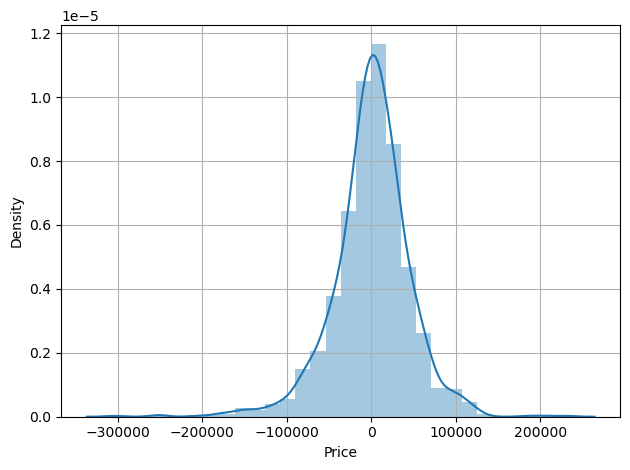

In [24]:
sns.distplot((y_test-Prediction),bins= 30)
plt.tight_layout()
plt.grid()
plt.show()

## Verification using Ridge and Lasso Regression Techniques

In [25]:
from sklearn.linear_model import Ridge,Lasso

Ridge = Ridge().fit(X_train,y_train)
Lasso = Lasso().fit(X_train,y_train)

Ridge_Acc = Ridge.predict(X_test)
Ridge_score = Ridge.score(X_test,y_test)
Lasso_Acc = Lasso.predict(X_test)
Lasso_score = Lasso.score(X_test,y_test)

In [26]:
# For Ridge Linear Regression Model
print(f"The Test Model R Square Value is {Ridge_score*100} %")

The Test Model R Square Value is 98.20160427295507 %


In [27]:
# For Lasso Regression Model
print(f"The Test Model R Square Value is {Lasso_score*100} %")

The Test Model R Square Value is 98.20206057257877 %


## Final Results 

In [28]:
Models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
R_Scores = [R_score_test*100, Ridge_score*100, Lasso_score*100]

Results = pd.DataFrame({'Model': Models, 'R_Score': R_Scores})

# Displaying the DataFrame
Results

,Model,R_Score
0,Linear Regression,98.202070
1,Ridge Regression,98.201604
2,Lasso Regression,98.202061
